In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.nddata import Cutout2D
from astropy import units
from astropy.io import fits
import glob
import os

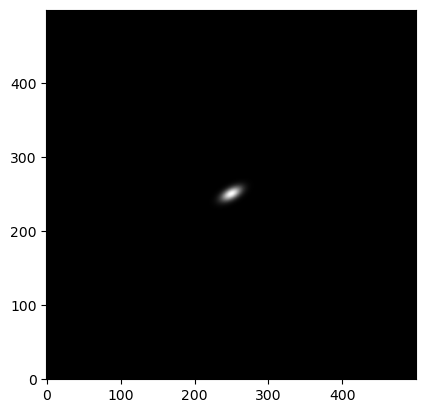

In [10]:
from astropy.modeling.models import Gaussian2D

y,x = np.mgrid[0:500, 0:500]
data = Gaussian2D(1, 250, 250, 10, 5, theta=0.5)(x, y)

plt.imshow(data, origin='lower', cmap='gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

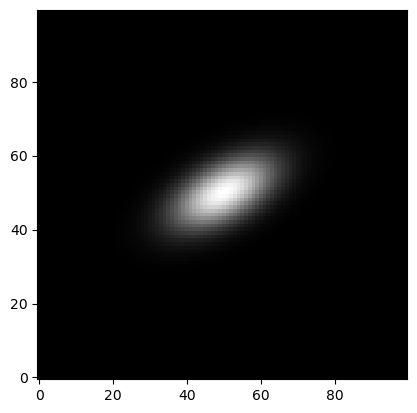

In [11]:
crop_center = (250, 250)
crop_size = units.Quantity((100,100), units.pixel)

#now we crop
crop = Cutout2D(data, crop_center, crop_size)
plt.imshow(crop.data, origin= 'lower', cmap='gray')
plt.show

In [12]:
filenames = glob.glob('data/*.fits')
filename = glob.glob('*.fits')
data_set = {}
filename

['20220921_174534_scanCH4_00000.fits', '20220921_180325_scanCH4_00001.fits']

In [13]:
import os
dr = os.path.abspath(path)
dr

'C:\\Users\\raynaudy\\Documents\\Programmation\\Python\\astropy'

In [14]:
#  HEADER

#hdul = Header Data Unit List cest une sorte de liste des objets HDU
# HDU est l'element au niveau le plus eleve des fichiers FITS typiquement avec Header et tableau de data
hdul = fits.open('/Users/raynaudy/Music/Programmation/20220921_174534_scanCH4_00000.fits')

# hdul[0] premier element du HDU
hdu = hdul[0]

# hdul.info() utile, permet de resume el contenue de fichier FITS ouvert
#hdu_info = hdul.info()

# hdul.close() pour ferme le fichier ouvert


#hdul[0].header ouvre le header complet, on peut specifier quel element du header on veut ouvrir avec
#lindex hdul[0].header[2] pour le 3eme element par ex ou par son nom hdul[0].header['NAXIS']
hdr = hdul[0].header
hdr3 =hdul[0].header[2]
hdrnxs = hdul[0].header['NAXIS']

#pour voir le header commme il apparait dans le fichier fits soit juste  hdr   soit  print(repr(hdr))
#print(repr(hdr))

#pour voir seulement les n premiers elements du header hdr[:n]
hdr_2_premiers_elements = hdr[:2]

#liste de tous les mots cles on utilise la methode hdr.keys()
#list(hdr.keys())



In [15]:
fl = '/Users/raynaudy/Music/Programmation/20220921_174534_scanCH4_00000.fits'
hdul = fits.open(fl)


In [16]:
import os
 
path = '.'
 
files = os.listdir(path)

for name in files:
    if '.fits' in name:
        print(name)

20220921_174534_scanCH4_00000.fits
20220921_180325_scanCH4_00001.fits


In [17]:
hdul[0].header['COMMENT']

  FITS (Flexible Image Transport System) format is defined in 'Astronomy
  and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H

In [18]:
hdu = fits.PrimaryHDU()
hdu.header 

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  

In [19]:
#pour avoir les infos de l'ensemble des elements de la liste hdu on tape
# hdul.info()

# avec hdul.info() on voit qu'on a 350 images dans le fichier FITS
#chaque image a 21 cards (cards un sorte de liste qui contient un keyword une valeur et un commentaire) qui sont des
#infos sur l'image
# chaque image a aussi un tableau de donnees de (640, 512) ces donnes sont 
#header de la premiere donnee
hdr = hdul[350].header
hdr

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  640 / length of data axis 1                          
NAXIS2  =                  512 / length of data axis 2                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = '20220922_162819_,40' / Name of this extension.                       
TYPE    = 'SCIENCE '           / Type image                                     
HIERARCH SOUS_TYPE = 'NORMAL  ' / Sous-type image                               
HIERARCH TEMPS_POSE = '10000   ' / Temps d'exposition (micro s)                 
GAIN    = '1       '           / Gain                                           
LAMBDA  = '1602.462478'     

In [1]:
hdul[1]

NameError: name 'hdul' is not defined

In [22]:
# recupere toutes les longueurs d'onde
def long_onde(f):
    list_lambda = []
    i = 1
    for i in range(1,len(f) - 1):
        list_lambda.append(f[i].header['LAMBDA'])
    return(list_lambda)
    #a = np.array(list_lambda)
    #print(a.shape)

    #recupere la reponse du pxl
def reponse_pxl(g):
    list_rep_pxl = []
    for i in range(1,len(g) - 1):   
        data = g[i].data
        list_rep_pxl.append(data[252][320])
    return(list_rep_pxl)
    #b = np.array(list_rep_pxl)
    #print(b.shape)

    #graph tout ca
def graph(l,p): 
    plt.title('Caract Pixel Camera')    
    plt.plot(l, p)
    plt.xlabel('Longueur donde (nm)')
    plt.ylabel('Intensite')
    plt.show()
    
def fits_file():
    path = '.'
    files = os.listdir(path)
    fits_files = []
    for name in files:
        if '.fits' in name:
            fits_files.append(name)
    return(fits_files)

"""    
def caract_pxl():
    onde = long_onde()
    pxl = reponse_pxl()
    graph(onde, pxl)
"""

def caract_pxl():
    wavel = []
    pxli = []
    fits_files = fits_file()
    for file in fits_files:
        print(file)
        hdul = fits.open(file)
        
        onde = long_onde(hdul)
        pxl = reponse_pxl(hdul)
        
        wavel = wavel + onde
        #pxli.append(pxl)
        pxli = pxli + pxl
    #print(wavel)
    graph(wavel, pxli)
    
    
    
def caract_pxl_1():
    wavel = []
    pxli = []
    hdul = fits.open( 'C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230207/20230207_120054_1650_to_1651_50pas_00000.fits')

    onde = long_onde(hdul)
    pxl = reponse_pxl(hdul)

    wavel = wavel + onde
    #pxli.append(pxl)
    pxli = pxli + pxl
    #print(wavel)
    graph(wavel, pxli)
        
    
   

In [25]:
def caract_pxl_2():
    wavel = []
    pxli = []
    hdul = fits.open( 'C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/without_CH4/20230207/20230207_115314_1650_to_1651_50pas_00000.fits')

    onde = long_onde(hdul)
    pxl = reponse_pxl(hdul)

    wavel = wavel + onde
    #pxli.append(pxl)
    pxli = pxli + pxl
    #print(wavel)
    graph(wavel, pxli)
        
    
   

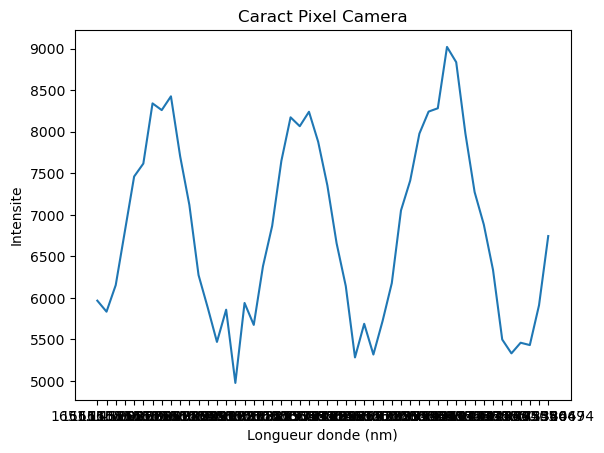

In [27]:
caract_pxl_2()

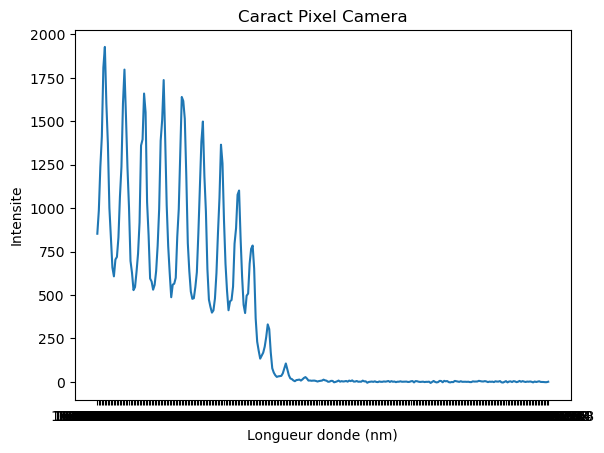

In [105]:

caract_pxl()

In [110]:
"""
# 20220921_174534_scanCH4_00000.fits
# 20220921_180325_scanCH4_00001.fits
hdul = fits.open('/Users/raynaudy/Music/Programmation/20220921_180325_scanCH4_00001.fits')

hdr = hdul[1].header
type(len(hdul))


"""

"\n# 20220921_174534_scanCH4_00000.fits\n# 20220921_180325_scanCH4_00001.fits\nhdul = fits.open('/Users/raynaudy/Music/Programmation/20220921_180325_scanCH4_00001.fits')\n\nhdr = hdul[1].header\ntype(len(hdul))\n\n\n"

In [26]:
hdul = fits.open('/Users/raynaudy/Music/Programmation/20220921_174534_scanCH4_00000.fits')

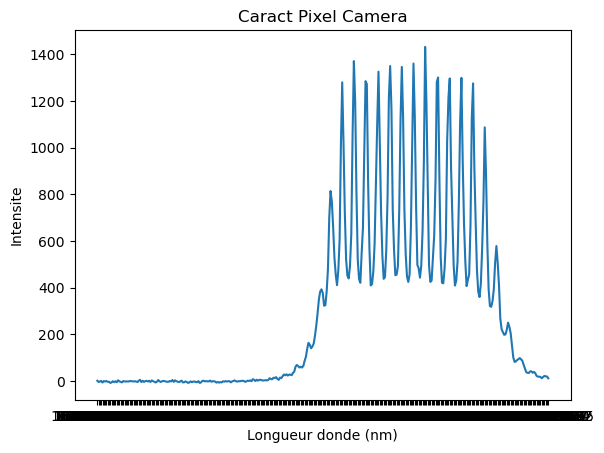

In [20]:
list_lambda = []
i = 1
for i in range(1,350):
    list_lambda.append(hdul[i].header['LAMBDA'])

list_rep_pxl = []
for i in range(1,350):   
    data = hdul[i].data
    list_rep_pxl.append(data[150][200])
    
plt.title('Caract Pixel Camera')    
plt.plot(list_lambda, list_rep_pxl)
plt.xlabel('Longueur donde (nm)')
plt.ylabel('Intensite')
plt.show()

In [42]:
"""
Si les data du HDU sont des images il retournera un objet tableau numpy ndarray qui correspond a lextension 'SCI'
On peut donc le manipuler avec les methodes numpy
"""

data = hdul[1].data

shape = data.shape
type_de_la_data = data.dtype.name


"""
Comme limage et un objet numpy on peut le decouper, faire des operations mathematiques dessus ..."""
valeur_pxl_a_x5_y2 = data[1,4]


#ici shape nous dit que notre data est 640x512, pour avoir le dernier element du dernier elmt : print(data[511][639])
#print(data[511][639])


In [154]:
def files():
    path = 'C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230207'
    files = os.listdir(path)
    fits_files = []
    specific = '293pas'
    for name in files:
        if specific in name and '.fits' in name:
            fits_files.append(path+'/'+name)
    return(fits_files)


fits_files = files()
for file in fits_files:
    hdul = fits.open(file)

    medhdul = []
    for i in range(1,len(hdul)):
        meddata = []
        data = hdul[i].data
        for j in range(0, len(data)):
            meddata.append(np.median(hdul[i].data[j]))
        medhdul.append(np.median(meddata))
        

        
        
#relation intensite / absorbance
#relation absorbance / concentration
#calculer concentration depuis spectre d'absorption
        

[4637.0, 4890.0, 5571.5, 6557.5, 7336.25, 7415.5, 6636.25, 5565.0, 4766.0, 4505.0, 4866.25, 5591.5, 6516.25, 7131.5, 7234.25, 6577.75, 5402.5, 4094.0, 2583.0, 430.0, 496.75, 3824.0, 6117.25, 6724.0, 6480.75, 5724.25, 4939.0, 6507.0, 5877.25, 5334.25, 5087.75, 5289.25, 5980.0, 6908.0, 7426.25, 7277.5, 6666.5, 5989.0, 5521.0, 5382.0, 5605.5, 6114.75, 6830.5, 7462.75, 7362.5, 6778.25, 6000.5, 5524.5, 5543.25, 6023.5, 6715.5, 7417.5, 7590.0, 7327.25, 6709.25, 6090.25, 5694.5, 5665.75, 6097.5, 6909.25, 7731.75, 7941.75, 7408.75, 6639.75, 5867.25, 5618.75, 5810.75, 6360.75, 7106.25, 7784.5, 7991.75, 7472.25, 6593.5, 5886.75, 5541.5, 5908.25, 6672.5, 7613.5, 8091.0, 7873.0, 7140.75, 6295.25, 5715.25, 5556.75, 5824.25, 6572.0, 7556.0, 8237.25, 7966.5, 6936.25, 6020.5, 5429.75, 5328.5, 5826.25, 6459.75, 6943.5, 7860.75, 7780.5, 6961.5, 5881.0, 5343.5, 5288.5, 5634.25, 6440.25, 7462.75, 7825.75, 7279.25, 6220.75, 5339.25, 4733.0, 4242.0, 3764.5, 2043.5, 7.5, 1256.0, 4487.75, 5252.5, 4770.0, 4796

In [150]:
data[1]

array([ 1.12083333e+00, -2.77166667e+00, -2.89583333e+00, -1.05400000e+01,
       -2.98833333e+00, -3.56416667e+00, -1.00233333e+01,  8.91666667e-02,
        1.44250000e+00, -7.57500000e-01, -1.92916667e+00,  2.31333333e+00,
        7.93333333e-01, -5.43333333e+00, -7.01000000e+00, -7.06666667e+00,
       -1.96833333e+00, -4.56916667e+00, -6.62500000e-01, -1.16583333e+00,
        2.61000000e+00, -6.29916667e+00, -3.88083333e+00, -2.75833333e-01,
        1.69750000e+00,  6.21666667e-01,  2.81583333e+00,  8.68833333e+00,
        4.78250000e+00, -7.07500000e-01,  8.14166667e-01, -1.43500000e+00,
        8.40000000e-01,  2.92916667e+00,  5.14166667e+00,  3.20500000e+00,
        5.69333333e+00,  2.80833333e-01,  2.53333333e+00,  6.47000000e+00,
        3.98083333e+00,  7.93083333e+00,  6.94166667e+00,  2.04750000e+00,
        8.63000000e+00,  5.06833333e+00,  7.35666667e+00,  6.04250000e+00,
        2.43166667e+00,  5.77500000e+00,  6.89666667e+00, -1.92083333e+00,
        1.38666667e+00,  

In [143]:
data = hdul[175].data
print('len data 1 ', len(data[1]))
q1,q3 = np.quantile(data[1], 0.25), np.quantile(data[1], 0.75)
IQR = q3-q1
bi,bs = q1 - 1.5*IQR , q3+1.5*IQR
bi, bs
dataqir=[]
for i in data[1]:
    if bi<i<bs:
        dataqir.append(i)
        
print('bi ', q1, 'bs ', q3)
dataqir
print('mediane data1 ',np.median(data[1]))
print('mean data1 ',np.mean(data[1]))

len data 1  640
bi  2.1908333333336714 bs  17.824791666666783
mediane data1  6.206666666666706
mean data1  13.07994270833333


In [149]:
medhdul = []
for i in range(1,len(hdul)):
    meddata = []
    for j in range(0, len(data)):
        meddata.append(np.median(hdul[i].data[j]))
    medhdul.append(np.median(meddata))
print(medhdul)
        
        

[-0.6750000000000682, -0.444374999999809, -0.23687499999994088, -0.7312500000000455, -0.9552083333334167, -0.4195833333333212, -1.2195833333332757, -0.24749999999983174, -0.5114583333332803, -0.3606250000000273, -0.47041666666666515, -0.25833333333332575, -0.783958333333203, -0.7539583333334576, -0.6497916666664878, -0.6664583333333667, -0.8350000000000364, -0.8422916666665969, -1.0947916666667652, -0.5918750000000728, -0.5829166666667334, -0.5968750000000682, -0.705208333333303, -0.9179166666667697, -0.6322916666665606, -0.46270833333323935, -1.0418750000000045, -0.6858333333333348, -0.7437499999999773, -1.0543749999998226, -0.8291666666667652, -0.9035416666663423, -0.863541666666606, -0.2624999999999318, -0.5364583333332575, -0.7889583333333121, -0.771041666666747, -0.4733333333334713, -0.17208333333337578, -1.1581249999999272, -0.5700000000001637, -0.619583333333253, -0.6187499999999773, -0.9266666666666197, -0.6675000000001319, -0.6010416666666742, -0.7883333333332985, -0.316041666

In [145]:
print(len(data))

512


(array([ 32., 243., 181.,  33.,  35.,  28.,  27.,  32.,  22.,   7.]),
 array([-10.54      ,  -2.63616667,   5.26766667,  13.1715    ,
         21.07533333,  28.97916667,  36.883     ,  44.78683333,
         52.69066667,  60.5945    ,  68.49833333]),
 <BarContainer object of 10 artists>)

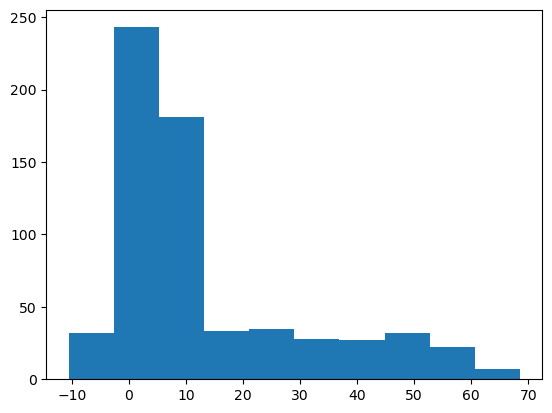

In [142]:
plt.hist(data[1])

In [84]:
def IQR():
    if x > bi and x <bs:
        return True

In [97]:
data[1][2]

-2.895833333333485

In [98]:
i=0
for i in data[i]:
    for j in data[i][j]:
        liste =filter(IQR(),data[i][j])
        l.append(liste)
        print(l)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
for x in data:
    if ( x < bi):
        data.remove(x)
print('len data 2 ', len(data))
#np.median(data)

In [37]:
print(len(hdul))

351


In [ ]:
for i in range (1, len(hdul)):
    

In [33]:
hdul.info()

Filename: /Users/raynaudy/Music/Programmation/20220921_174534_scanCH4_00000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  20220922_161155_,25    1 ImageHDU        21   (640, 512)   float64   
  2  20220922_161158_,02    1 ImageHDU        21   (640, 512)   float64   
  3  20220922_161200_,89    1 ImageHDU        21   (640, 512)   float64   
  4  20220922_161203_,64    1 ImageHDU        21   (640, 512)   float64   
  5  20220922_161206_,49    1 ImageHDU        21   (640, 512)   float64   
  6  20220922_161209_,30    1 ImageHDU        21   (640, 512)   float64   
  7  20220922_161212_,13    1 ImageHDU        21   (640, 512)   float64   
  8  20220922_161214_,97    1 ImageHDU        21   (640, 512)   float64   
  9  20220922_161217_,86    1 ImageHDU        21   (640, 512)   float64   
 10  20220922_161220_,63    1 ImageHDU        21   (640, 512)   float64   
 11  20220922_161223_,50    1 ImageHDU        21   (640,

In [ ]:
#data.field(0)

In [ ]:
"""
from astropy.utils.data import get_pkg_data_filename

file = get_pkg_data_filename('file.fits')
fits.info(file)


"""

In [ ]:
"""
TEST1
from astropy.io import fits
fits_image_filename =  astropy.io.fits.open(file)

hdul = fits.open(fits_image_filename)
hdul.info()


TEST2
fits_image_filename = fits.open("file.fits")
hdul = fits.open(fits_image_filename)

"""

In [ ]:
for file in filenames:
    #going for the first file
    #file = filenames[0]
    
    img_header = fits.open(file)
    img_data = fits.getdata(file)
    crop_center = ((img_data.shape[0]/2), img_data.shape[1] / 2)
    crop_size = units.Quantity((100, 100), units.pixel)
    
    ## what I want to do
    # open the header and image data
    #create the file object with header info and data:
    #              CCD_TEMP
    #              EXP_TIME
    #              PICTTYPE
    #              img_data.shape <- to verify the proper geometry
    #              CROP(data)
    #              min, max, mean, std_dev
    
    # Let's create the crop
    
    img_crop = Cutout2D(img_data, crop_center, crop_size)
    img_sample = []
    data_set[file.split('/')[1]] = img_sample

In [ ]:
img_header

In [ ]:
img_data

In [ ]:
filenames = glob.glob('data/*fits')
data_set = {}

for file in filenames:
    #going for the first file
    #file = filenames[0]
    
    img_header = fits.open(file)
    img_data = fits.getdata(file)
    
    # we're going to measure the center of the image, 100x100
    crop_center = ((img_data.shape[0]/2), img_data.shape[1] / 2)
    crop_size = units.Quantity((100, 100), units.pixel)
    
    ## what I want to do
    # open the header and image data
    #create the file object with header info and data:
    #              CCD_TEMP
    #              EXP_TIME
    #              PICTTYPE
    #              img_data.shape <- to verify the proper geometry
    #              CROP(data)
    #              min, max, mean, std_dev
    
    # Let's create the crop
    
    img_crop = Cutout2D(img_data, crop_center, crop_size)
    
    # and write the required header and data into a sample dict
    
    img_sample = {'PICTTYPE' : img_header[0].header['PICTTYPE'],
                  'ff_geometry' : img_data.shape,
                  'crop_geometry' : img_crop.shape,
                  'EXPTIME' : img_header[0].header['EXPTIME'],
                  'CCD-TEMP' : img_header[0].header['CCD-TEMP'],
                  'min' : np.min(img_crop.data),
                  'max' : np.max(img_crop.data),
                  'mean' : np.mean(img_crop.data),
                  'std_dev' : np.std(img_crop.data),
                  'data' : img_crop.data}
    
    # join it to the main data_set, keyed off file name
    
    data_set[file.split('/')[1]] = img_sample

In [ ]:

for x,y in data_set.items():
    print(x, '\nTemp :', (y['CCD-TEMP']), '\ntype:', (y['PICTTYPE']), '\nEXPTIME:' , (y['EXPTIME']), '\nStdDev:', (y['std_dev']))
    plt.imshow(y['data'], origin='lower', cmap='gray')
    plt.colorbar()
    plt.show()